# Classification  
We use features, and a classifier, to predict categorical variables.  

### Steps in doing Classification 
1. Import Packages 
2. Load dataset  and set X and y 
3. Train-test Split  
4. Descriptive and Prescriptive Analytics on Train Set  
5. Predictive Analytics from Train Set to Test Set  
6. Metrics (accuracy, confusion matrix)  
7. Explain Results  

# 1. Import Packages

In [1]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import pandas_profiling as pp


sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import confusion_matrix

# Classification metrix report
from sklearn.metrics import classification_report

## CROSS VALIDATION

from sklearn.model_selection import cross_val_score

##XGBOOAST
from xgboost import XGBClassifier



In [2]:
##SMOTE##
!pip install imblearn
from imblearn.over_sampling import SMOTE

# 2. Load Data

In [3]:
data = pd.read_csv('census.csv')

In [4]:
report = pp.ProfileReport(data)

In [5]:
report.to_file('CensusData.html')

In [6]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
data.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Dataset Description  




In [8]:
# write list of features we want to use
features = ['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

# Set X
X = data[features]
y= data['income']



In [9]:
# write list of features we want to use
features = ['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

# Set X
X_temp = data[features]


# Convert text to numeric
X = pd.get_dummies(X_temp)


# Set y
y = data["income"]
y =pd.get_dummies(y)
#y = y.drop('>50K',axis=1)


In [10]:
y = y['<=50K']

In [11]:
##SMOTE


In [12]:
X.shape

(45222, 103)

# 3. Train-Test Split  
We use the training set for descriptive and diagnostic analytics and use the model we develop here to do predictive analytics on the test set.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [14]:
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_sample(X_train,y_train)


# 4. Predictive Analytics
Train a model that predicts the house price nabased on all selected features


In [15]:
# initialize model
XGB_Boost =XGBClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

# fit model
#Gradient_Boost.fit(X_train, y_train)

scores = cross_val_score(XGB_Boost, X_train, y_train, cv=10)

# predictions
y_pred = XGB_Boost.predict(X_test)






In [16]:
print(scores)

[0.80421982 0.80863592 0.81084396 0.88567223 0.91462218 0.91511286
 0.91779141 0.92269939 0.91190184 0.91435583]


In [17]:
y_pred.shape

(18089,)

In [18]:
print(y_test)

20084    0
20027    1
39505    1
39534    1
12586    0
        ..
26276    1
18554    1
17292    1
36666    1
17440    1
Name: <=50K, Length: 18089, dtype: uint8


# 5. Metrics

Classification report matrix

In [19]:
target_names= ['<=50K', '>50k']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

       <=50K       0.66      0.76      0.71      4453
        >50k       0.92      0.87      0.89     13636

    accuracy                           0.84     18089
   macro avg       0.79      0.82      0.80     18089
weighted avg       0.85      0.84      0.85     18089



### What is a Confusion Matrix?  
A confusion matrix is a summary of prediction results on a classification problem.  

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.  

The confusion matrix shows the ways in which your classification model is confused when it makes predictions.  

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.  

It is this breakdown that overcomes the limitation of using classification accuracy alone.  

In [20]:
# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[ 3383,  1070],
       [ 1757, 11879]], dtype=int64)

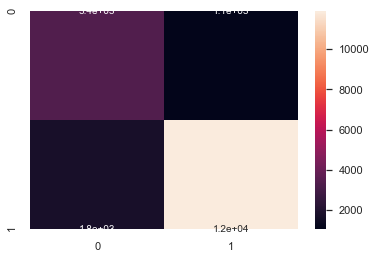

In [21]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

# 7. Explain Results

84% accuracy means the model is able to predict  the house price but it can be improved.  
For the confusion matrix, we want the diagonal values to be higher than off diagonal values.   
For the heatmap of confusion matrix, we want the diagonal to be darker than off diagonal.

[Guide to confusion matrices](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

# 8. Explain Predictions

We can try out our model with new data to see if we can predict the house price based on provided features.

In [22]:
# Assign test data into new variable
test_data = X_test

# Create column to insert predictions
test_data['predictions'] = y_pred

In [23]:
# Describe why the 
test_data[test_data['predictions']==0].describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,predictions
count,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,...,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.0,5140.000000,5140.000000,5140.000000,5140.0
mean,44.296887,11.703891,3452.429183,184.538911,46.042802,0.053891,0.078794,0.670233,0.082685,0.074903,...,0.002335,0.000584,0.001751,0.001751,0.000778,0.0,0.931128,0.000778,0.001362,0.0
std,9.704497,2.153902,13435.585313,578.080235,10.338055,0.225825,0.269443,0.470174,0.275432,0.263260,...,0.048266,0.024154,0.041812,0.041812,0.027888,0.0,0.253260,0.027888,0.036882,0.0
min,21.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
50%,44.000000,13.000000,0.000000,0.000000,44.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
75%,51.000000,13.000000,0.000000,0.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
max,90.000000,16.000000,99999.000000,3004.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [24]:
test_data[test_data['predictions']==1].describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,predictions
count,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,...,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,12949.000000,12949.0
mean,36.248204,9.481659,153.014673,50.768631,38.858908,0.022087,0.064407,0.766237,0.016217,0.086879,...,0.004865,0.000541,0.002548,0.000618,0.001081,0.000618,0.905398,0.002471,0.000386,1.0
std,13.692298,2.386097,864.011247,302.340147,11.958194,0.146971,0.245485,0.423240,0.126316,0.281669,...,0.069584,0.023245,0.050420,0.024849,0.032865,0.024849,0.292676,0.049652,0.019647,0.0
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,25.000000,9.000000,0.000000,0.000000,36.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
50%,33.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,45.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
max,90.000000,16.000000,34095.000000,3900.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
